本节介绍了**函数逼近基本概念、插值法、内积空间和正交多项式、函数最佳平方估计、周期函数逼近与快速傅里叶变换、最佳一致逼近、有理逼近**.
详情见[《现代数值分析》 二、数值逼近](https://www.jianshu.com/p/558175a8aa0f)

本文用到python的sympy库进行符号运算，
可以到第一章进行了解。

原创内容,如需转载需征得作者同意。

Copyright©2020 lizhemin
***

1.$f(x)=sin \frac{\pi}{2}x$,给出$[0,1]$上的伯恩斯坦多项式$B_1(f,x)$及$B_2(f,x)$

**解**：$B_n(f,x)=\sum\limits_{k=0}^{n}f\left(\frac{k}{n}\right)C_k^nx^k(1-x)^{n-k}$

带入得$B_1(f,x)=\sin (\frac{\pi}{2})x=x$,$B_2(f,x)=\sin (\frac{\pi}{2})\cdot 2\cdot x\cdot (1-x)+\sin (\frac{\pi}{2})x^2=2x-x^2$
***

2.当$f(x)=x$,求证$B_n(f,x)=x$

**证：**即证$B_n(f,x)=\sum\limits_{k=0}^{n}\frac{k}{n}\cdot C_k^nx^k(1-x)^{n-k}=x$
***

3.证明函数$1,x,\ldots,x^n$线性无关

**证**：反设不线性相关，则$\exists c_0,c_1,\ldots,c_n$不全为零 s.t. $\sum_{i=0}^n c_i\cdot x^i=0$

令$x=0\Rightarrow c_0=0\Rightarrow \sum_{i=1}^{n}c_i\cdot x^i=0\Rightarrow \sum_{i=0}^{n-1}c_{i+1}\cdot x^{i}\Rightarrow c_1=0\Rightarrow \ldots \Rightarrow c_i=0,i=0,1,2,\ldots,n$
***

4.计算下列向量的$\|x\|_{\infty},\|x\|_{1},\|x\|_{2}$

(1) $x=\left(3,-4,0,\frac{3}{2}\right)$
(2) $x=\left(2,-1,3,-4\right)$
(3) $x=\left(\sin k,\cos k,2^k\right)$,k为正整数
***

(1),norm_inf= 4.0
(1),norm_1= 7.15
(1),norm_2= 5.0022494939776845
(2),norm_inf= 4
(2),norm_1= 10
(2),norm_2= 5.477225575051661
⎡sin(k)⎤
⎢      ⎥
⎢cos(k)⎥
⎢      ⎥
⎢   k  ⎥
⎣  2   ⎦
(3),norm_inf= Max(2**re(k), Abs(sin(k)), Abs(cos(k)))
原图


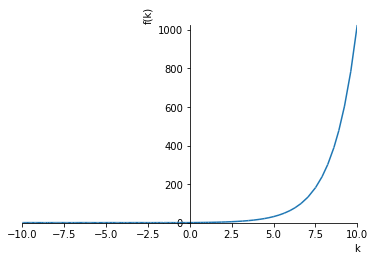

log 缩放y轴，看出区别


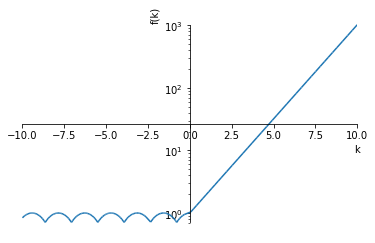

(3),norm_1= 2**re(k) + Abs(sin(k)) + Abs(cos(k))
原图


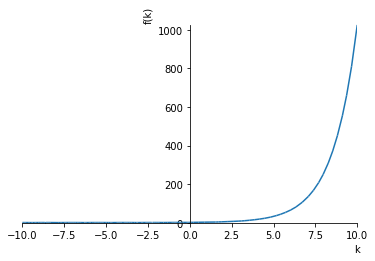

log 缩放y轴，看出区别


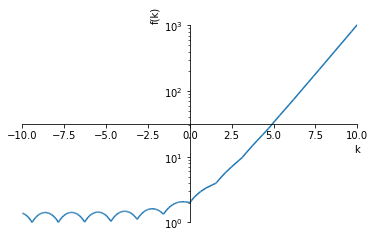

(3),norm_2= sqrt(2**(2*re(k)) + Abs(sin(k))**2 + Abs(cos(k))**2)
原图


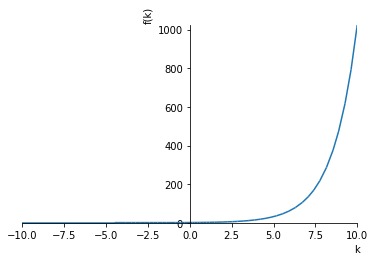

log 缩放y轴，看出区别


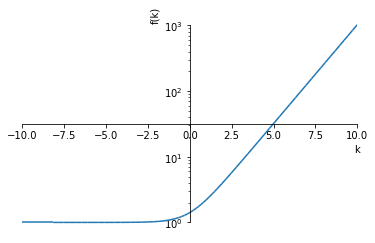

In [18]:
import numpy as np
import sympy as sp

def num_vec_norm(x,norm='inf'):
    #x is a nunpy vector, norm can be {'inf','1','2'}.
    x = x.reshape(-1,1)
    if norm=='inf':
        return_x = np.max(np.abs(x))
    elif norm=='1':
        return_x = np.sum(np.abs(x))
    elif norm=='2':
        return_x = np.sqrt(np.sum(x**2))
    else:
        print('please input right norm')
    return return_x



#start test
x_1 = np.array([3,-4,0.3/2])
x_2 = np.array([2,-1,3,-4])
norm_name=['inf','1','2']
for name in norm_name:
    x_1_result = num_vec_norm(x_1,norm=name)
    print('(1),norm_'+name+'=',x_1_result)
for name in norm_name:
    x_2_result = num_vec_norm(x_2,norm=name)
    print('(2),norm_'+name+'=',x_2_result)

k = sp.Symbol('k')
x_3 = sp.Matrix([sp.sin(k),sp.cos(k),2**k])
sp.pprint(x_3)
for name in norm_name:
    if name == 'inf':
        ord = sp.oo
    else:
        ord = int(name)
    x_3_result = x_3.norm(ord)
    print('(3),norm_'+name+'=',x_3_result)
    #此处输出为复数值，为更直观表达，将作出图像
    print('原图')
    sp.plotting.plot(x_3_result,yscale='linear')
    print('log 缩放y轴，看出区别')
    sp.plotting.plot(x_3_result,yscale='log')


5.证明，当$f\in C[a,b],\|f\|_2=\left\{\int_a^b f^2(x) dx\right\}^{\frac{1}{2}}$是$C[a,b]$上的一个范数

**证明**：三条性质：非负、线性、三角不等式。

前两条显然，因为积分是线性运算，可以把常数提出。而三角不等式可以使用柯西施瓦兹不等式得到。
***

6.计算下列函数$f$关于$C[0,1]$的$\|f\|_{\infty},\|f\|_{1},\|f\|_{2}$

(1) $f(x)=(x-1)^3$
(2) $f(x)=\left|x-\frac{1}{2}\right|$
(3) $f(x)=x^m(1-x)^n$,m与n为正整数
(4) $f(x)=(x+1)^{10} e^{-x}$




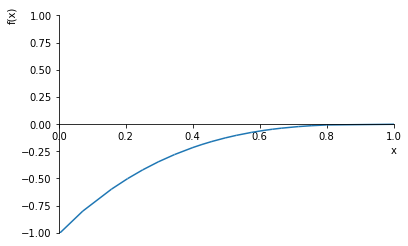

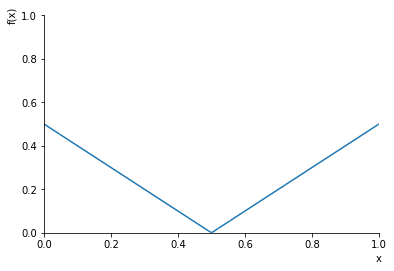

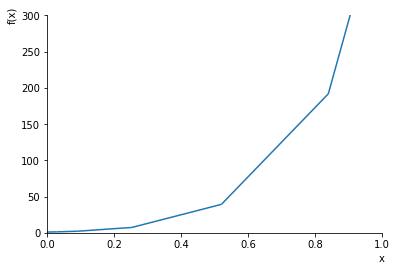

In [41]:
import sympy as sp
norm_name=['inf','1','2']

x = sp.Symbol('x')
m = sp.Symbol('m')
n = sp.Symbol('n')
f_1 = (x-1)**3
f_2 = sp.Abs(x-1/2)
f_3 = x**m*(1-x)**n
f_4 = (x+1)**10*sp.E**(-x)
#直接编程写出一般的计算比较麻烦，需要讨论的比较多，此处画出几幅图
sp.plotting.plot(f_1,xlim=(0,1),ylim=(-1,1))
sp.plotting.plot(f_2,xlim=(0,1),ylim=(0,1))
#sp.plotting.plot(f_3)
sp.plotting.plot(f_4,xlim=(0,1),ylim=(0,300))

7.证明$\|f-g\|\geq \|f\|-\|g\|$

**证明**由三角不等式，显然
***

8.选择$a$,使积分$\int_{-1}^1 (x-ax^2)^2 dx$取得最小

**解：**将积分视为$a$的函数，即$f(a)=\int_{-1}^1 (x-ax^2)^2 dx$

$f''(a)=\int_{-1}^1 2x^4 dx=\frac{4}{5}>0$,即极值点为函数的最小值。

令$f'(a)=0$解得$a=0$带入原式有$\min \int^{1}_{-1}(x-ax^2)^2 dx=\int_{-1}^1 x^2 dx=\left. \frac{x^3}{3}\right|_{-1}^1=\frac{2}{3}$
***

9.记$\omega_0(x)=1,\omega_k(x)=(x-x_0)\ldots(x-x_k)$.证明$\{\omega_k(x)\}_0^n$线性无关.

**证明：**反证法，假设线性相关，则存在不全为零$c_0,c_1,\ldots,c_n$使得$f(x)=\sum_{k=0}^n c_k\cdot\omega_k(x)=0$

依次解$f(x_k),k=0,1,\ldots,n-1,n$即可。
***

10.给出下面函数表，利用牛顿差商插值构造插值多项式

| x    	| 0        	| 0.1      	| 0.3      	| 0.6      	| 1.0      	|
|--------	|----------	|----------	|----------	|----------	|----------	|
| f(x) 	| -6.00000 	| -6.89483 	| -5.65014 	| -5.17788 	| -4.28172 	|

**分析：**构造差商表进行计算

| 节点     	| 0阶差商  $\quad$	| 1阶差商      $\quad$	| 2阶差商       $\quad\quad\quad\quad$   	| 3阶差商      $\quad\quad\quad\quad\quad$        	| 4阶差商    $\quad\quad\quad\quad\quad\quad\quad$              	| $\ldots$ 	|
|----------	|----------	|--------------	|------------------	|----------------------	|--------------------------	|----------	|
| $x_0$    	| $f[x_0]$ 	|              	|                  	|                      	|                          	|          	|
| $x_1$    	| $f[x_1]$ 	| $f[x_0.x_1]$ 	|                  	|                      	|                          	|          	|
| $x_2$    	| $f[x_2]$ 	| $f[x_1.x_2]$ 	| $f[x_0.x_1,x_2]$ 	|                      	|                          	|          	|
| $x_3$    	| $f[x_3]$ 	| $f[x_2.x_3]$ 	| $f[x_1.x_2,x_3]$ 	| $f[x_0,x_1,x_2,x_3]$ 	|                          	|          	|
| $x_4$    	| $f[x_4]$ 	| $f[x_3.x_4]$ 	| $f[x_2.x_3,x_4]$ 	| $f[x_1,x_2,x_3,x_4]$ 	| $f[x_0,x_1,x_2,x_3,x_4]$ 	|          	|

In [63]:
import sympy as sp
import numpy as np
def dq(f):
    #input with shape of (N,2), numpy array.
    #output a polynominal of interpotation
    N = f.shape[0]
    #sort datas from low to high
    argsort = f[:,0].argsort(axis=0)
    f = f[argsort]
    xi = f[:,0]
    #calculate differential quation
    dtab = np.zeros((N,N))
    dtab[:,0] = f[:,1]
    for col in range(1,N):
        for row in range(col,N):
            dtab[row,col] = (dtab[row,col-1]-dtab[row-1,col-1])/(xi[row]-xi[row-col])
    print(dtab)
    poly = 0
    for i in range(N):
        x_now = 1
        for j in range(i):
            x_now *= (x-xi[j])
        poly += dtab[i,i]*x_now
    return sp.simplify(poly)

f = np.array([[0,-6],[0.1,-6.89483],[0.3,-5.65014],[0.6,-5.17788],[1,-4.28172]])
x = sp.Symbol('x')
poly = dq(f)
sp.pprint(poly)

#test the result
for i in range(f.shape[0]):
    print('f at x=',f[i,0],' is ',f[i,1])
    print('we calculate it as ',poly.evalf(subs={x:f[i,0]}))

[[ -6.           0.           0.           0.           0.        ]
 [ -6.89483     -8.9483       0.           0.           0.        ]
 [ -5.65014      6.22345     50.5725       0.           0.        ]
 [ -5.17788      1.5742      -9.2985     -99.785        0.        ]
 [ -4.28172      2.2404       0.95171429  11.38912698 111.17412698]]
                  4                     3                     2               
111.174126984127⋅x  - 210.959126984127⋅x  + 120.503514285714⋅x  - 19.000234285

            
7143⋅x - 6.0
f at x= 0.0  is  -6.0
we calculate it as  -6.00000000000000
f at x= 0.1  is  -6.89483
we calculate it as  -6.89483000000000
f at x= 0.3  is  -5.65014
we calculate it as  -5.65014000000000
f at x= 0.6  is  -5.17788
we calculate it as  -5.17788000000000
f at x= 1.0  is  -4.28172
we calculate it as  -4.28171999999998


11.给出$f(x)=\ln x$的函数表如下：

| x    | 0.4        | 0.5      | 0.6      | 0.7      |
|------|----------|----------|----------|----------|
| ln x | -0.916291 | -0.693147 | -0.510826 | -0.357765 |

用拉格朗日插值求$\ln 0.54$近似值并估计误差(计算取$n=1$及$n=3$)

**分析**：拉格朗日法公式：$L_{n}(x)=\sum_{k=0}^{n}-\frac{w_{n}(x)}{\left(x-x_{n}\right) w^{\prime}_{n}\left(x_{k}\right)} f\left(x_{k}\right)$其中$w_{n}(x)=\left(x-x_{0}\right)\left(x-x_{1}\right) \dots\left(x-x_{n}\right)$

阶段误差$R_{n}(x)=f(x)-p(x)=\frac{f^{(n+1)}(\xi)}{(n+1) !} w_{n}(x), \quad \xi \in(a, b)$

In [80]:
import sympy as sp
import numpy as np

def lagrange(f):
    N = f.shape[0]
    xi = f[:,0]
    yi = f[:,1]
    L = 0
    for i in range(N):
        w = 1
        for j in range(N):
            w *= (x-xi[j])
        wd = sp.diff(w,x)
        wd = wd.evalf(subs={x:xi[i]})
        L_now = w/(x-xi[i])/wd * yi[i]
        L += L_now
    return sp.simplify(L)

x = sp.Symbol('x')
f = np.array([[0.4,-0.916291],[0.5,-0.693147],[0.6,-0.510826],[0.7,-0.357765]])
poly = lagrange(f)
sp.pprint(poly)

#test
for i in range(f.shape[0]):
    print('f at x=',f[i,0],' is ',f[i,1])
    print('we calculate it as ',poly.evalf(subs={x:f[i,0]}))
    
#okay
result = poly.evalf(subs={x:0.54})
print('ln0.54=',result)

#use taylor expands to estimate error
def rem(f,real,n,x_in):
    xi = f[:,0]
    w = 1
    dr = sp.diff(real,x,n+1)
    for i in range(n+1):
        w *= (x-xi[i])
        if i != 0:
            w /= i
    w = w.evalf(subs={x:x_in})
    return sp.simplify(dr*w)

lnx = sp.log(x)
rem_func = rem(f,lnx,1,0.54)
print('n=1时,余项为:')
sp.pprint(rem_func)
print('在x=0.7有最大值',rem_func.evalf(subs={x:0.7}))
rem_func = rem(f,lnx,3,0.54)
print('n=3时,余项为:')
sp.pprint(rem_func)
print('在x=0.7有最大值',rem_func.evalf(subs={x:0.7}))

                  3                     2                                     
1.92716666666684⋅x  - 4.93190000000016⋅x  + 5.49457833333349⋅x - 2.44835700000

   
003
f at x= 0.4  is  -0.916291
we calculate it as  -0.916290999999980
f at x= 0.5  is  -0.693147
we calculate it as  -0.693146999999968
f at x= 0.6  is  -0.510826
we calculate it as  -0.510825999999953
f at x= 0.7  is  -0.357765
we calculate it as  -0.357764999999936
ln0.54= -0.615967367999962
n=1时,余项为:
-0.00560000000000001 
─────────────────────
           2         
          x          
在x=0.7有最大值 -0.0114285714285714
n=3时,余项为:
-5.37600000000001e-5 
─────────────────────
           4         
          x          
在x=0.7有最大值 -0.000223906705539359


12.在$-1\leq x\leq 0$上给出$f(x)=e^x$的具有5位有效数字的函数表，若用线性插值求$e^x$的值使它具有4位有效数字，试问所使函数表步长应取多大?

**解：**当$f\in C^2[a,b]$,使用分段线性插值时，余项$R(x)=f(x)-I_h(x)$有估计式
$$
|R(x)|\leq \frac{Mh^2}{8},M=\max_{a\leq x\leq b}|f''(x)|
$$

易得$h\leq 2\sqrt(2)\times 10^{-2}$

13.求次数$\leq 4$的多项式$p$，使它满足$p(1)=p(0)=p(-1)=1,p'(1)=p'(-1)=2$

**分析：**属于Hermite插值，关键点是$n$个条件，得到的多项式次数会$\leq n$,求解过程仿照书上例题即可，只不过少了一个导数条件而已。

14.设$f\in C[a,b]$试求它在$[a,b]$上的一次样条函数.

**分析**：即分段线性插值，使用直线直接连接相邻点即可。
***

15.建立三次样条插值函数$s$,并求$f(0)$的近似值$s(0)$,这里已给函数表：

| $x_i$    	| -0.3        	| -0.1      	| 0.1      	| 0.3      	| 
|--------	|----------	|----------	|----------	|----------	|
| $f(x_i)$ 	| -0.20431 	| -0.08983 	| 0.11007 	| 0.33599 	|

边界条件$s''(-0.3)=s''(0.3)=0$

**分析：**此时为自然边界条件下的三次样条函数求解

使用三弯矩法求解
***
给出**三类边界条件**：
(1)${s}^{\prime}\left(x_{0}\right)={f}_{0}^{\prime}, \quad {s}^{\prime}\left(x_{n}\right)=f^{\prime}$

(2)${s}^{\prime \prime}\left(x_{0}\right)=f_{0}^{\prime\prime}, \quad {s}^{\prime\prime}\left(x_{n}\right)=f^{\prime \prime}$

(3)$s^{(j)}\left(x_{0}\right)=s^{(j)}\left(x_{n}\right), \quad j=0, \quad 1,2$
***
**算法(三次样条插值的三弯矩法)：**
1. 输入初始数据$(x_i,y_i),i=0,1,\ldots,n$及边界条件.
2. 对$i=1,\ldots,n$,计算
$$
h_{i-1}=x_i-x_{i-1},f[x_{i-1},x_{i}]=\frac{f_i-f_{i-1}}{h_{i-1}}
$$
3. 对$i=0,1,\ldots,n$计算$\mu_i,\lambda_i,d_i$
其中$i=1,2,\ldots,n-1$时,$\mu_{t}=\frac{h_{i-1}}{h_{i-1}+h_{i}}, \quad \lambda_{i}=1-\mu_{i}$，$d_{i}=6\left(\frac{f_{i+1}-f_{i}}{h_{i}}-\frac{f_{i}-f_{i-1}}{h_{i-1}}\right) \frac{1}{h_{i-1}+h_{i}}=6 f\left[x_{i-1}, x_{i}, x_{i+1}\right]$
对于边界条件:
(1)$\lambda_{0}=1, \quad d_{0}=\frac{6}{h_{0}}\left(f\left[x_{0}, x_{1}\right]-f_{0}^{\prime}\right), \quad \mu_{n}=1,d_{n}=\frac{6}{h_{n-1}}\left(f_{n}^{\prime}-f[x_{n-1},x_n]\right)$
(2)有$\lambda_{0}=\mu_{n}=0, \quad d_{0}=2 f_{0}^{\prime \prime}, \quad d_{n}=2 f_n^{\prime\prime}$
(3)$\lambda_{n}=h_{0}\left(h_{n-1}+h_{0}\right)^{-1}, \quad \mu_{n}=1-\lambda_{n}, d_{n}=6\left(f\left[x_{0}, x_{1}\right]-f\left[x_{n-1},x_n\right]\right)/\left(h_0+h_{n-1}\right)$
4. 用追赶法解方程组
$$
\left(\begin{array}{cccccc}
2 & \lambda_{1} & & & &\mu_1 \\
\mu_{2} & 2 & \lambda_{2} & & &  \\
& \ddots & \ddots & \ddots & & \\
 & & \ddots & \ddots & \ddots &  \vdots & . \\
& & & \mu_{n-1} & 2 & \lambda_{n-1} \\
\lambda_n& & & & \mu_{n} & 2\end{array}\right)
\left(\begin{array}{c}M_{0} \\
M_{1} \\
\vdots \\
\vdots \\
\vdots \\ 
M_{n-1} \\ 
M_{\mathrm{n}}\end{array}\right)=\left(\begin{array}{c}d_{0} \\
d_{1} \\ 
\vdots \\
\vdots \\
\vdots \\
d_{n-1} \\
d_{n}\end{array}\right)
$$
5. 由下式求得$s(x)$
$$
 s(x)= M_{i-1} \frac{\left(x_{i}-x\right)^{3}}{6 h_{i-1}}+M_{i} \frac{\left(x-x_{i-1}\right)^{3}}{6 h_{i-1}}+\left(f_{i-1}-\frac{M_{i-1} h_{i-i}^{2}}{6}\right) \cdot \frac{x_{i}-x}{h_{i-1}}+\left(f_{i}-\frac{M_{i} h_{i-1}^{2}}{6}\right)  \cdot \frac{x-x_{i-1}}{h_{i-1}}, \quad x \in\left[x_{i-1}, x_{1}\right]
$$
***

In [86]:
import numpy as np

def dq(f):
    #input with shape of (N,2), numpy array.
    #output a polynominal of interpotation
    N = f.shape[0]
    #sort datas from low to high
    argsort = f[:,0].argsort(axis=0)
    f = f[argsort]
    xi = f[:,0]
    #calculate differential quation
    dtab = np.zeros((N,N))
    dtab[:,0] = f[:,1]
    for col in range(1,N):
        for row in range(col,N):
            dtab[row,col] = (dtab[row,col-1]-dtab[row-1,col-1])/(xi[row]-xi[row-col])
    return xi,dtab

def thrs(f=None,cond=None,cond_in=(1,2)):
    xi,dtab = dq(f)
    N = dtab.shape[0]
    vec_lambda = np.zeros((N,1))
    vec_mu = np.zeros((N,1))
    vec_d = np.zeros((N,1))
    #step 2
    vec_h = np.diff(xi,axis=0)
    #step 3
    for i in range(1,N-1):
        vec_mu[i] = vec_h[i-1]/(vec_h[i-1]+vec_h[i])
        vec_lambda[i] = 1-vec_mu[i]
        vec_d[i] = 6*dtab[i+1,2]
    #border condition
    if cond == 1:
        vec_mu[0] = 0
        vec_mu[N-1] = 1
        vec_lambda[0] = 1
        vec_lambda[N-1] = 0
        vec_d[0] = 6/vec_h[0]*(dtab[1,1]-cond_in[0])
        vec_d[N-1] = 6/vec_h[N-2]*(cond_in[1]-dtab[N-1,1])
    elif cond == 2:
        vec_mu[0] = 1
        vec_mu[N-1] = 0
        vec_lambda[0] = 0
        vec_lambda[N-1] = 1
        vec_d[0] = 2*cond_in[0]
        vec_d[N-1] = 2*cond_in[1]
    elif cond==3:
        raise('wait')
        vec_mu[0] = 0
        vec_mu[N-1] = 1-vec_h[0]/(vec_h[N-2]+vec_h[0])
        vec_lambda[0] = 0
        vec_lambda[N-1] = vec_h[0]/(vec_h[N-2]+vec_h[0])
        vec_d[0] = 2*cond_in[0]
        vec_d[N-1] = 2*cond_in[1]
    else:
        raise('wrong cond')
    #Catch up
    print('mu:',vec_mu,'\r lambda:',vec_lambda,'\r d:',vec_d)
    
thrs(f,cond=2,cond_in=(0,0))
    

mu: [[1. ]
 [0.5]
 [0.5]
 lambda: [[0. ]
 [0.5]
 [0.5]
 d: [[  0.    ]
 [-12.2469]
 [ -8.778 ]
 [  0.    ]]


16.设$f\in C^4[a,b],s$是以节点$a=x_0 < x_1<\ldots<x_n=b$的$f$三次插值样条函数并满足条件$s'(x)=f'(x),x=a,b$求证$\int_a^b\left[f''(x)-s''(x)\right]^2 dx=\int_a^b \left[f(x)-s(x)\right]f^{(4)}(x) dx$

17.试给出线性$B-$样条的基

18.$f,g\in C^1 [a,b]$定义

(a) $(f,g)=\int_a^b f'(x)g'(x) dx$

(b) $(f,g)=\int_a^b f'(x)g'(x)dx+f(a)g(a)$

问它们是否构成内积.

19.令$T^*_n(x)=T_n(2x-1),x\in [0,1],$试证$\{T^*_n(x)\}$是在$[0,1]$上带权$\rho(x)=\frac{1}{\sqrt{x-x^2}}$的正交多项式，并求$T^*_0(x),T^*_1(x),T^*_2(x),T^*_3(x)$

20.对权函数$\rho(x)=1+x^2$,区间$[-1,1]$,试求首项系数为1的正交多项式$\varphi_n(x),n=0,1,2,3$

21.试证明第二类切比雪夫多项式族$\{u_n(x)\}$是$[-1,1]$上带权$\rho(x)=\sqrt{1-x^2}$的正交多项式。

22.证明切比雪夫多项式$T_n$满足微分方程

$$(1-x^2)T''_n(x)-xT'_n(x)+n^2T_n(x)=0$$

23.$f(x)=\left|x\right|$在$[-1,1]$上求在$\Phi=Span\{1,x^2,x^4\}$上的最佳平方逼近多项式.

24.求函数$f$在指定区域上对于$\Phi=Span\{1,x\}$的最佳平方逼近多项式：

(1)$f(x)=\frac{1}{x},[1,3]$

(2)$f(x)=e^x,[0,1]$

(3)$f(x)=\cos \pi x,[0,1]$

(4)$f(x)=\ln x,[1,2]$

25.$f(x)=\sin \frac{\pi}{2}x$在$[-1,1]$上按勒让德多项式展开求三次最佳平方逼近多项式

26.观测物体的直线运动，得出以下的数据：

| 时间  t(秒)  	| 0        	| 0.9      	| 1.9     	| 3.0      	| 3.9      	|5.0
|--------	|----------	|----------	|----------	|----------	|----------	|----------	|
| 距离 s(米) 	| 0 	| 10 	| 30 	| 50 	| 80 	|110|

求运动方程

27.已知实验数据如下：

| $x_i$    	| 19        	| 25      	| 31      	| 38      	| 44      	|
|--------	|----------	|----------	|----------	|----------	|----------	|
| $y_i$ 	| 19.0 	| 32.8 	| 49.0 	| 73.3 	| 97.8 	|

用最小二乘法求形如$y=a+bx^2$的经验公式,并计算均方误差。

28.在某化学反应中，由实验得分解物浓度与时间关系如下：

| 时间 t                  	| 0 	| 5    	| 10   	| 15   	| 20   	| 25   	| 30   	| 35   	| 40   	| 50   	| 60   	| 70   	|
|-------------------------	|---	|------	|------	|------	|------	|------	|------	|------	|------	|------	|------	|------	|
| 浓度y($\times 10^{-4}$) 	| 0 	| 1.27 	| 2.16 	| 2.86 	| 3.44 	| 3.87 	| 4.15 	| 4.37 	| 4.61 	| 4.82 	| 1.65 	| 4.66 	|

用最小二乘法求$y=F(t)$

29.给出一张记录$\{f_k=(4,3,2,1,0,1,2,3)\}$,用$FFT$算法求$f_k$的离散谱$C_k$.

30.选常数$a$使$\max_{0\leq x\leq 1}\left | x^3-ax\right |$达到极小

31.设$f\in C[a,b],$试证明$f$的零次最佳逼近多项式

$P(x)=\frac{1}{2}(M+m),$其中$M,m$分别为$f$在$[a,b]$上的最大值和最小值。

32.$f(x)=\frac{1}{3+x}$在$[-1,1]$上求最佳逼近一次多项式

33.求$f(x)=e^x$在$[0,1]$上的最佳逼近一次多项式

34.求$f(x)=x^4+3x^2-1$在$[0,1]$上的最佳逼近三次多项式

35.设在$[-1,1]$上，$\phi(x)=a-\frac{1}{2}x+\frac{1}{8}x^2-\frac{3}{24}x^3+\frac{15}{384}x^4-\frac{65}{3840}x^5$,试利用项数节约将$\phi$降到三次多项式。

36.在$[-1,1]$上利用幂级数节约求$f(x)=\sin x$的三次逼近多项式，使误差不超过$0.005$

37.将$f(x)=\arccos x$在$[-1,1]$上展成切比雪夫级数，写出它的前三项

38.用辗转相除法将$R_{2,2}(x)=\frac{3x^2+6x}{x^2+6x+6}$化成连分式

39.用形如$\frac{x-a}{bx+c}$的形式进行有理插值，使通过点$(0,-2),(1,-\frac{1}{3}),(-1,3)$

40.给定一组点$(0,7),(1,4),(2,2),(3,3)$试建立通过此组点的反差商有理插值函数。

41.求$f(x)=\ln (1+x)$的帕德逼近$R(1,2),R(3,3)$并用$R(3,3)$计算$\ln 2$的近似值并估计误差